**Assignment-2: Advanced Random Variables Concepts**

**Answer 1:**

In [34]:
import numpy as np
from prettytable import PrettyTable

# reading the pdf values in a numpy array
joint_probs = np.array([[0.1, 0.2, 0.1],
                        [0.2, 0.3, 0.0],
                        [0.0, 0.1, 0.0]])

# defining the values of X and Y as given in the question
values_X = [1, 2, 3]
values_Y = [1, 2, 3]

# Calculating the marginal probability distribution of X
marginal_X = np.sum(joint_probs, axis=1)

# Storing the values of x and p(x) in a dictionary
dict_marginal_X = {x: p for x, p in zip(values_X, marginal_X)}

# Calculating the marginal probability distribution of Y
marginal_Y = np.sum(joint_probs, axis=0)

# Storing the values of y and p(y) in a dictionary
dict_marginal_Y = {y: p for y, p in zip(values_Y, marginal_Y)}

# Printing the values in the form of a table
tableX = PrettyTable()

print("a)\n")
print("Marginal Probability Distribution of X:\n")

tableX.field_names = ["X"] + list(map(str, values_X))
tableX.add_row(["P(X)"] + [f'{p:.2f}' for p in marginal_X])

print(tableX)

tableY = PrettyTable()
print("\nMarginal Probability Distribution of Y:\n")

tableY.field_names = ["Y"] + list(map(str, values_Y))
tableY.add_row(["P(Y)"] + [f'{p:.2f}' for p in marginal_Y])

print(tableY)

# Calculating conditional probability of P(X = 2 | Y = 1)

print("\n")
p_X2_given_Y1 = joint_probs[1][0]/dict_marginal_Y[1]

print(f"b) P(X=2|Y=1) = {p_X2_given_Y1:.3f}")

# Checking if X and Y are independant random variables through a simple for loop
print("\n")
isIndependent = True
for i in range(len(values_X)):
    for j in range(len(values_Y)):
        if marginal_X[i] * marginal_Y[j] != joint_probs[i][j]:
            isIndependent = False
            break


if isIndependent:
    print("c) X and Y are independent")
else:
    print("c) X and Y are not independent")


a)

Marginal Probability Distribution of X:

+------+------+------+------+
|  X   |  1   |  2   |  3   |
+------+------+------+------+
| P(X) | 0.40 | 0.50 | 0.10 |
+------+------+------+------+

Marginal Probability Distribution of Y:

+------+------+------+------+
|  Y   |  1   |  2   |  3   |
+------+------+------+------+
| P(Y) | 0.30 | 0.60 | 0.10 |
+------+------+------+------+


b) P(X=2|Y=1) = 0.667


c) X and Y are not independent


**Answer 2:**


a) The cumulative distribution function (CDF) of X is:

       ⎧0   for x < 0
       ⎪             
       ⎪ 3           
F(x) = ⎨x   for x ≤ 1
       ⎪             
       ⎪1   otherwise
       ⎩             




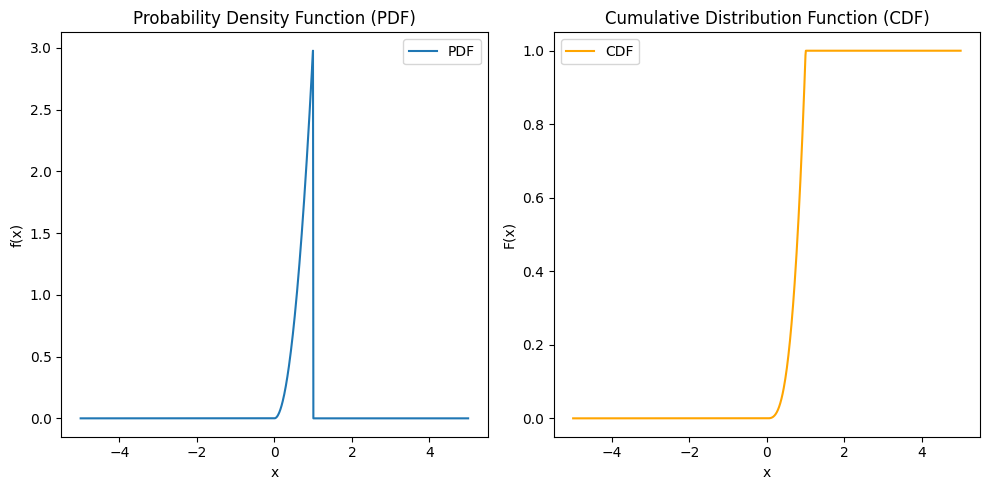




b) Mean of X: 0.750

c) Variance of X: 0.038


In [35]:
import matplotlib.pyplot as plt
from scipy.integrate import quad
import sympy as sp

# Defining the PDF function, given in the question
def pdf(x):
    if 0 <= x <= 1:
        return 3 * x**2
    else:
        return 0

# Defining the CDF function, which was found through integration by manual solving
def cdf(x):
  if(0 <= x <= 1):
    return x**3
  elif (x < 0):
    return 0
  else:
    return 1

print("a) The cumulative distribution function (CDF) of X is:\n")

# printing the cdf
x = sp.symbols('x')
cdf_expr = sp.Piecewise((0, x < 0), (x**3, x <= 1), (1, True))
sp.pretty_print(sp.Eq(sp.Function('F')(x), cdf_expr), use_unicode=True)

print("\n")

# Calculating mean and variance using integration using scipy library
mean, garberror = quad(lambda x: x * pdf(x), 0, 1)
variance, garberror = quad(lambda x: (x - mean)**2 * pdf(x), 0, 1)

# Generating x values for plotting
x_values = np.linspace(-5, 5, 1000)
pdf_values = [pdf(x) for x in x_values]
cdf_values = [cdf(x) for x in x_values]

# Plotting the PDF
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x_values, pdf_values, label='PDF')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Probability Density Function (PDF)')
plt.legend()

# Plotting the CDF
plt.subplot(1, 2, 2)
plt.plot(x_values, cdf_values, label='CDF', color='orange')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative Distribution Function (CDF)')
plt.legend()

plt.tight_layout()
plt.show()

# Printing mean and variance
print("\n\n")
print(f"b) Mean of X: {mean:.3f}")
print(f"\nc) Variance of X: {variance:.3f}")

**Answer 3:**


a) The probability density function (PDF) of Y is:

       ⎧ 0    for y ≤ 0
       ⎪               
       ⎪ 1             
F(y) = ⎨────  for y ≤ 1
       ⎪2⋅√y           
       ⎪               
       ⎩ 1    otherwise




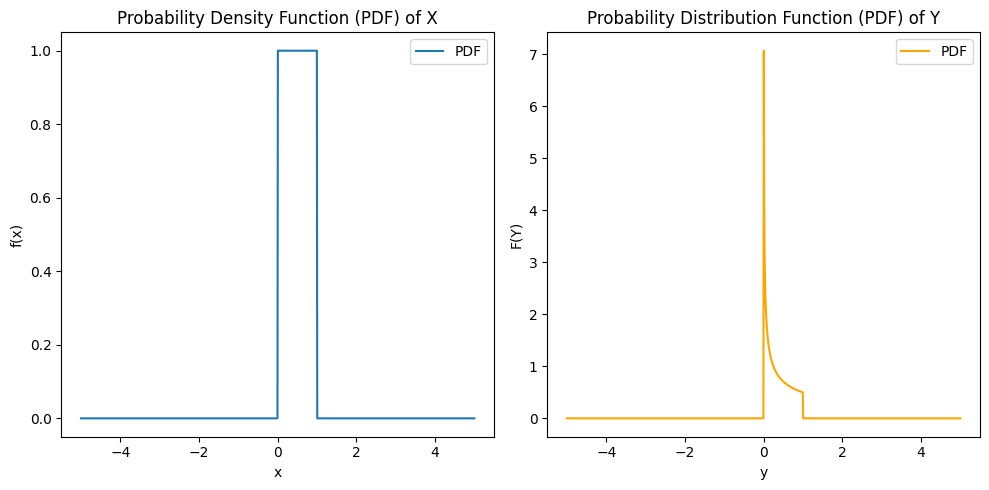




b) Mean of Y: 0.333

c) Variance of Y: 0.089


In [36]:
# Defining the PDF of X (uniform on [0, 1])
def pdf_X(x):
    if 0 <= x <= 1:
        return 1
    else:
        return 0

# Defining the PDF of Y through transformations which was done manually
def pdf_Y(y):
    if 0 < y <= 1:
        return 1 / (2 * np.sqrt(y))
    else:
        return 0

print("a) The probability density function (PDF) of Y is:\n")

# Printing the calculated pdf
y = sp.symbols('y')
cdf_expr = sp.Piecewise((0, y <= 0), (1 / (2 * sp.sqrt(y)), y <= 1), (1, True))
sp.pretty_print(sp.Eq(sp.Function('F')(y), cdf_expr), use_unicode=True)

print("\n")

# Calculating mean and variance using integration using scipy library
mean, garberror = quad(lambda x: x * pdf_Y(x), 0, 1)
variance, garberror = quad(lambda x: (x - mean)**2 * pdf_Y(x), 0, 1)


# Generating x values for plotting
x_values = np.linspace(-5, 5, 1000)
pdfX_values = [pdf_X(x) for x in x_values]
pdfY_values = [pdf_Y(x) for x in x_values]

# Plotting the PDF
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x_values, pdfX_values, label='PDF')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Probability Density Function (PDF) of X')
plt.legend()

# Plotting the CDF
plt.subplot(1, 2, 2)
plt.plot(x_values, pdfY_values, label='PDF', color='orange')
plt.xlabel('y')
plt.ylabel('F(Y)')
plt.title('Probability Distribution Function (PDF) of Y')
plt.legend()

plt.tight_layout()
plt.show()

print("\n\n")
print(f"b) Mean of Y: {mean:.3f}")
print(f"\nc) Variance of Y: {variance:.3f}")


**Answer 4:**

In [37]:
# Defining the joint probability distribution
joint_prob = np.array([
    [0.2, 0.1, 0.1],
    [0.1, 0.2, 0.1],
    [0.1, 0.1, 0.0]
])

# Defining the corresponding values for X and Y
x_values = np.array([1, 2, 3])
y_values = np.array([1, 2, 3])

# Calculating E(X)
E_X = np.sum(x_values * np.sum(joint_prob, axis=1))

# Calculating E(Y)
E_Y = np.sum(y_values * np.sum(joint_prob, axis=0))

# Calculating E(XY)
E_XY = np.sum(x_values[:, np.newaxis] * y_values * joint_prob)

# Calculating E(X^2)
E_X2 = np.sum(x_values ** 2 * np.sum(joint_prob, axis=1))

# Calculating E(Y^2)
E_Y2 = np.sum(y_values ** 2 * np.sum(joint_prob, axis=0))

# Calculating the covariance using the formula
covariance = E_XY - E_X * E_Y

# Calculating the standard deviations of X and Y
std_dev_X = np.sqrt(E_X2 - (E_X ** 2))
std_dev_Y  = np.sqrt(E_Y2 - (E_Y ** 2))

# Calculating the correlation coefficient using the formulal
correlation_coefficient = covariance / (std_dev_X * std_dev_Y)

# Determining whether X and Y are positively or negatively correlated
correlation_type = "positvely"

if correlation_coefficient < 0:
  correlation_type = "negatively"

elif correlation_coefficient == 0:
  correlation_type = "uncorrelated"

# Displaying the results
print(f"a) Covariance between X and Y: {covariance:.3f}")
print("\nb) X and Y are", correlation_type, "correlated")
print(f"\nc) Correlation Coefficient between X and Y: {correlation_coefficient:.3f}")

a) Covariance between X and Y: -0.040

b) X and Y are negatively correlated

c) Correlation Coefficient between X and Y: -0.071


**Answer 5:**

In [38]:
# Storing the given data in a numpy array

stock_data = np.array([
    [-2, 0.1],
    [-1, 0.2],
    [0, 0.3],
    [1, 0.25],
    [2, 0.15]
])

# Accessing individual values
x_values = stock_data[:, 0]
probabilities = stock_data[:, 1]

# Calculating the mean
mean = np.sum(x_values * probabilities)

# Calculating the variance
variance = np.sum((x_values - mean)**2 * probabilities)

# Calculating the standard deviation
std_deviation = np.sqrt(variance)

# Calculating P(X >= 1)
probability_1 = np.sum(probabilities[x_values >= 1])

# Calculating P(-1 <= X <= 1)
probability_2 = np.sum(probabilities[(x_values >= -1) & (x_values <= 1)])


print(f"a) Mean: {mean:.3f}")
print(f"\nb) Variance: {variance:.3f}")
print(f"\nc) Standard Deviation: {std_deviation:.3f}")
print(f"\nd) P(X >= 1): {probability_1}")
print(f"\ne) P(-1 <= X <= 1) = {probability_2}")

a) Mean: 0.150

b) Variance: 1.428

c) Standard Deviation: 1.195

d) P(X >= 1): 0.4

e) P(-1 <= X <= 1) = 0.75
